
**Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.**





In [1]:
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:",keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


**Q2. Load the Wine Quality dataset and explore its dimensions.**
https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [21]:
import pandas as pd
wine_data=pd.read_csv("/content/drive/MyDrive/Data Set/wine.csv")

In [22]:
wine_data.shape

(1599, 12)

**Q3. Check for null values, identify categorical variables, and encode them.**


In [23]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [25]:
wine_data['quality'].head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()

In [26]:
wine_data['quality']=lencode.fit_transform(wine_data['quality'])

In [27]:
wine_data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [28]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Q4. Separate the features and target variables from the dataset.**


In [29]:
X=wine_data.drop('quality',axis=1)
y=wine_data['quality']

In [30]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

**Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.**


In [33]:
from sklearn.model_selection import train_test_split
# Perform a train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the 'temp' data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the dimensions of each set
print("Training set dimensions:", X_train.shape, y_train.shape)
print("Validation set dimensions:", X_val.shape, y_val.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)




Training set dimensions: (1279, 11) (1279,)
Validation set dimensions: (160, 11) (160,)
Test set dimensions: (160, 11) (160,)


**Q6. Scale the dataset using an appropriate scaling technique.**


In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

<ipython-input-35-b56d0f4aeb67>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

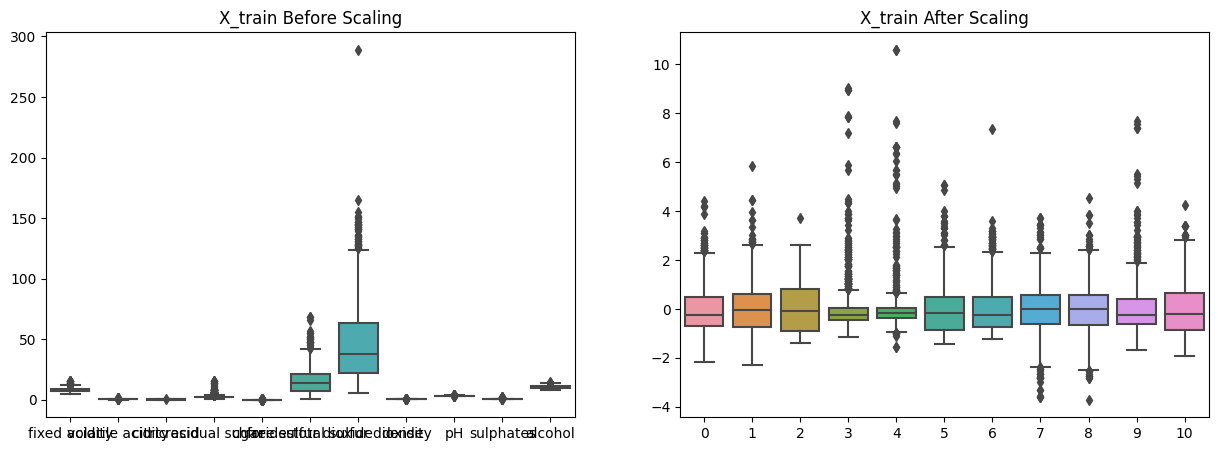

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.**


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your input features have n features
input_dim = wine_data.shape[1] - 1  # Exclude the target variable

# Define the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=64, input_dim=input_dim, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



**Q8. Create a Sequential model in Keras and add the previously designed layers to it.**


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Sequential model
model = Sequential()

# Add the first hidden layer with input dimension
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




**Q9. Print the summary of the model architecture.**


In [38]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.**


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




**Q11. Compile the model with the specified loss function, optimizer, and metrics.**


In [40]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Q12. Fit the model to the training data using appropriate batch size and number of epochs.**


In [41]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
40/40 [==============================] - 4s 12ms/step - loss: 0.9058 - accuracy: 0.5481 - val_loss: 0.7018 - val_accuracy: 0.6062
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6458 - accuracy: 0.6419 - val_loss: 0.7008 - val_accuracy: 0.6062
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6317 - val_loss: 0.6856 - val_accuracy: 0.6000
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6255 - val_loss: 0.6743 - val_accuracy: 0.5875
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6352 - accuracy: 0.6310 - val_loss: 0.7138 - val_accuracy: 0.5813
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.6474 - val_loss: 0.6435 - val_accuracy: 0.6062
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6134 - accuracy: 0.6521 - val_loss: 0.6872 - val_accuracy: 0.6000
Epoch 8/20
40/40 [=

**Q13. Obtain the model's parameters (weights and biases).**


In [42]:
# Get the model's parameters
model_weights = model.get_weights()

# Display the parameters
for i, layer_weights in enumerate(model_weights):
    print(f"Layer {i + 1} weights shape:", layer_weights.shape)
    print(f"Layer {i + 1} weights:")
    print(layer_weights)
    print("\n")


Layer 1 weights shape: (11, 64)
Layer 1 weights:
[[-1.41460240e-01 -1.55044571e-01 -7.20412955e-02  2.52561659e-01
   1.54546022e-01  1.59964725e-01  2.53432184e-01 -2.30510700e-02
  -5.54444790e-02 -1.93690494e-01 -6.03974462e-02  3.02168548e-01
   8.83359537e-02 -1.29449800e-01  1.72640339e-01 -2.26209760e-01
  -2.70836234e-01 -1.14778399e-01  1.82143897e-01 -2.29382627e-02
  -1.21194184e-01 -1.12889156e-01  1.68085620e-02 -1.84217513e-01
   5.65639623e-02 -2.31194124e-01  2.00174958e-01 -1.68336973e-01
  -2.18945637e-01 -1.15728252e-01  1.45154595e-01 -1.21815025e-03
   6.61765262e-02  2.90182203e-01  3.76503468e-02  5.46863191e-02
   2.44818896e-01  2.26881161e-01  1.96440537e-02 -6.67192191e-02
   1.20192282e-01  2.15125293e-01 -1.12942293e-01  2.25988060e-01
  -2.38758512e-02  1.44951597e-01  2.61183172e-01 -3.15716803e-01
  -1.60178304e-01 -8.15092493e-03  7.21179768e-02 -2.39483535e-01
   1.24339342e-01 -1.70329511e-01  7.27388263e-03 -1.05525121e-01
  -2.61458158e-01  1.849329

**Q14. Store the model's training history as a Pandas DataFrame.**


In [43]:
import pandas as pd

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Convert the training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)




Epoch 1/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.7232 - val_loss: 0.6312 - val_accuracy: 0.6562
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5532 - accuracy: 0.7303 - val_loss: 0.5837 - val_accuracy: 0.6625
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5500 - accuracy: 0.7154 - val_loss: 0.5966 - val_accuracy: 0.7000
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5518 - accuracy: 0.7068 - val_loss: 0.5710 - val_accuracy: 0.6562
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5598 - accuracy: 0.7029 - val_loss: 0.7171 - val_accuracy: 0.6750
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5504 - accuracy: 0.7256 - val_loss: 0.6294 - val_accuracy: 0.6875
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7029 - val_loss: 0.5752 - val_accuracy: 0.6875
Epoch 8/20
40/40 [==

**Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.**


Epoch 1/20
40/40 [==============================] - 1s 14ms/step - loss: 0.5252 - accuracy: 0.7365 - val_loss: 0.5633 - val_accuracy: 0.6938
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7389 - val_loss: 0.5667 - val_accuracy: 0.7000
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7263 - val_loss: 0.5457 - val_accuracy: 0.6875
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.7271 - val_loss: 0.5422 - val_accuracy: 0.6875
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7381 - val_loss: 0.5790 - val_accuracy: 0.6875
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.6982 - val_loss: 0.5575 - val_accuracy: 0.6938
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7201 - val_loss: 0.5681 - val_accuracy: 0.6938
Epoch 8/20
40/40 [=

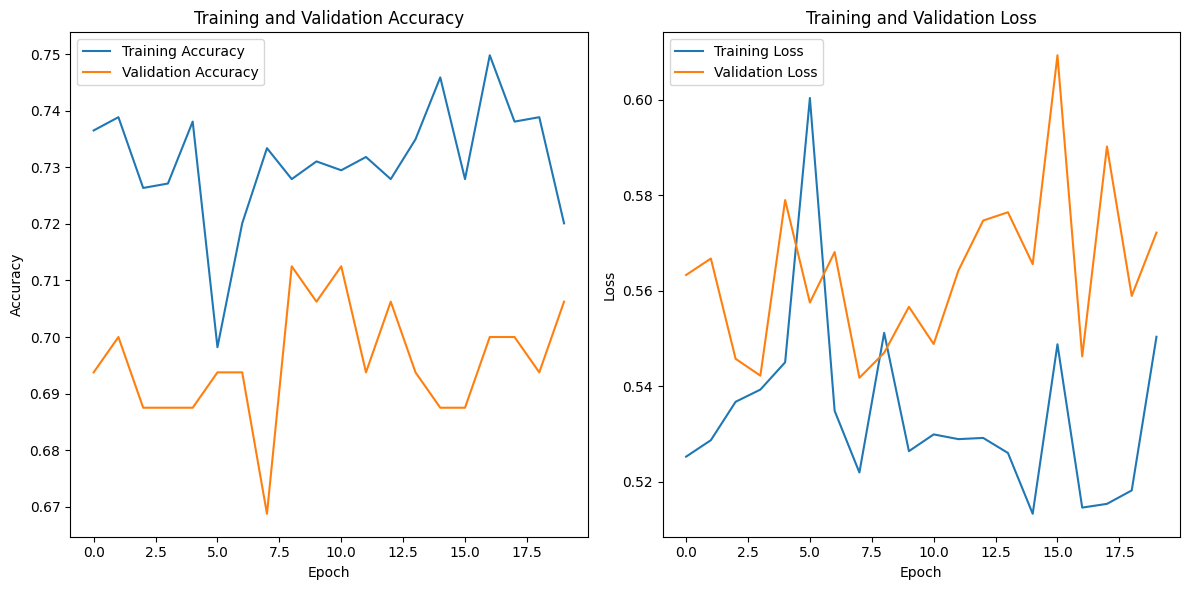

In [44]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Get the training history
history_dict = history.history

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


**Q16. Evaluate the model's performance using the test dataset and report relevant metrics.**

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


5/5 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.6938
Test Loss: 0.5464
Test Accuracy: 69.38%
